<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Fall 2024 <br> FINAL PROJECT<br>Assignment 3 [GROUP Assignment]</h1>

---
<br>

#### (Change Unis in the title of your notebook. The format should be `assignment3_Part1_GRPID_UNI1_UNI2... UNIn.ipynb`)
#### **Your Unis** : ya2516, kc3713
#### **Your Full names** : Yuchen An,Kevin Chien
#### **Link to your Public Github repository** : Fill here (https://github.com/Yuchen-A/ADV-Machine-Learning.git)


## **Stanford Sentiment Treebank - Movie Review Classification**

## Instructions for Part 1 (simple models):
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn TFIDF Vectorizer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data



### 1. Get dataset in and set up training, validation and test data

In [4]:
# IMPORT DATA
!git clone https://github.com/YJiangcm/SST-2-sentiment-analysis.git

fatal: destination path 'SST-2-sentiment-analysis' already exists and is not an empty directory.


In [6]:
# Set up X_train, X_test, and y_train_labels objects
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

headers = ['sentiment', 'review']

train_df = pd.read_csv('SST-2-sentiment-analysis/data/train.tsv', sep='\t', names=headers)
val_df = pd.read_csv('SST-2-sentiment-analysis/data/dev.tsv', sep='\t', names=headers)
test_df = pd.read_csv('SST-2-sentiment-analysis/data/test.tsv', sep='\t', names=headers)

train_df.head()

,sentiment,review
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [66]:
# From train_df
X_train = train_df['review']# Your Code Here
y_train = train_df['sentiment']# Your Code Here

# From val_df
X_val = val_df['review']# Your Code Here
y_val = val_df['sentiment']# Your Code Here

# From test_df
X_test = test_df['review']# Your Code Here
y_test = test_df['sentiment']# Your Code Here

X_train.head()

0    a stirring , funny and finally transporting re...
1    apparently reassembled from the cutting-room f...
2    they presume their audience wo n't sit still f...
3    this is a visually stunning rumination on love...
4    jonathan parker 's bartleby should have been t...
Name: review, dtype: object

### 2.Preprocess data and Analyze


In [31]:
# Build a Document-Term Matrix (DTM) out of words in the training set
# Remove stop words that occur too frequently to be useful, and
# Use Term Frequency - Inverse Document Frequency (TF-IDF) formula to weight by how common words are generally


# I added additional data processing steps in the cell following the visualization.

# Code here
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df = 2)
tfidf_vectorizer.fit(X_train)
dtm_tfidf = tfidf_vectorizer.transform(X_train)
dtm_tfidf_df = pd.DataFrame(dtm_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

dtm_tfidf_df.head()

,10,100,101,10th,11,110,12,13,15,163,...,zeal,zealand,zero,zhang,zhuangzhuang,zing,zinger,zippy,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Write function to transform data with preprocessor
# New samples will be put into a DTM based on vocabularly from training set

# code here
def preprocessor(text):
    dtm_new = tfidf_vectorizer.transform(text)
    dtm_new_df = pd.DataFrame(dtm_new.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    return dtm_new_df

print(preprocessor(X_train).shape)
print(preprocessor(X_test).shape)

(6920, 6446)
(1821, 6446)


Perform EDA and Visualizations (class balance, review lengths, word frequency per class, Wordcloud, etc)

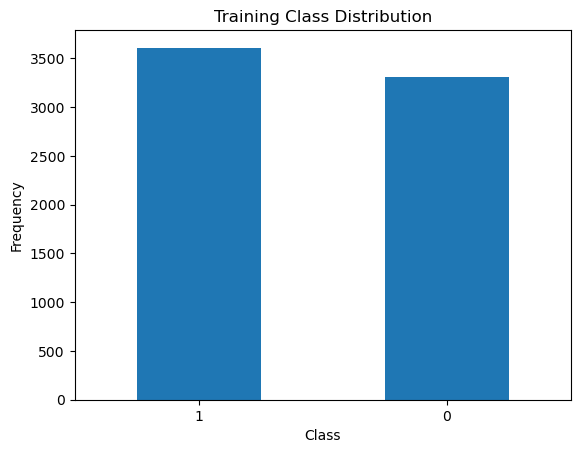

In [12]:
# EDA and Viz code
import matplotlib.pyplot as plt
train_df['sentiment'].value_counts().plot(kind='bar', title='Training Class Distribution', rot=0)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

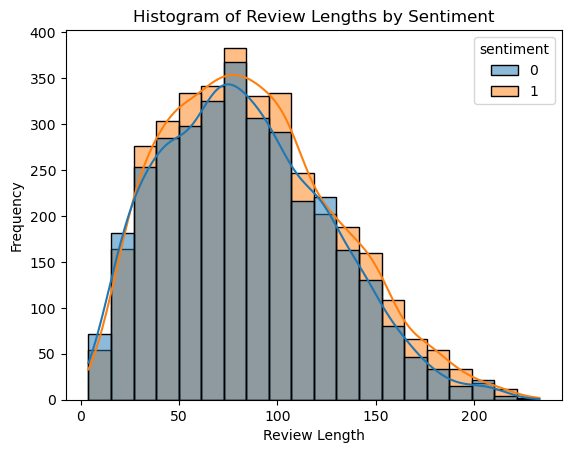

In [14]:
import textstat
import seaborn as sns
df_text = train_df.copy()
df_text['character_count'] = df_text['review'].apply(lambda x: textstat.char_count(x, ignore_spaces=True))
sns.histplot(data=df_text, x='character_count', hue='sentiment', kde=True, bins=20)
plt.title('Histogram of Review Lengths by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [16]:
from nltk.stem import WordNetLemmatizer
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
df_text['clean_text'] = df_text['review'].str.lower()
df_text['clean_text'] = df_text['clean_text'].str.replace('[^\w\s]', '', regex=True)
df_text['tokens'] = df_text['clean_text'].str.split()
stop_words = set(stopwords.words('english'))
df_text['tokens'] = df_text['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
lemmatizer = WordNetLemmatizer()
df_text['tokens'] = df_text['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

sentiment_0 = df_text[df_text['sentiment'] == 0]['tokens']
sentiment_1 = df_text[df_text['sentiment'] == 1]['tokens']

all_tokens_sentiment_0 = [item for sublist in sentiment_0 for item in sublist]
all_tokens_sentiment_1 = [item for sublist in sentiment_1 for item in sublist]

token_counts_sentiment_0 = Counter(all_tokens_sentiment_0)
token_counts_sentiment_1 = Counter(all_tokens_sentiment_1)

freq_df_0 = pd.DataFrame(token_counts_sentiment_0.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
freq_df_1 = pd.DataFrame(token_counts_sentiment_1.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anyuchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


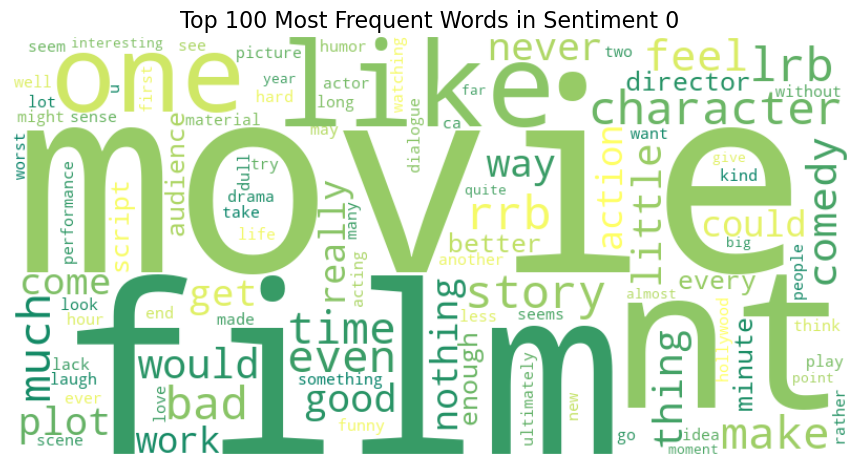

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Extract the top 100 words and their frequencies
top_words_df = freq_df_0.head(100)
word_freq_dict = dict(zip(top_words_df['Word'], top_words_df['Frequency']))

# Step 2: Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='summer',
    contour_color='black',
    contour_width=1,
    random_state=42
).generate_from_frequencies(word_freq_dict)

# Step 3: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 100 Most Frequent Words in Sentiment 0', fontsize=16)
plt.tight_layout()
plt.axis('off')  # Hide axes
plt.show()


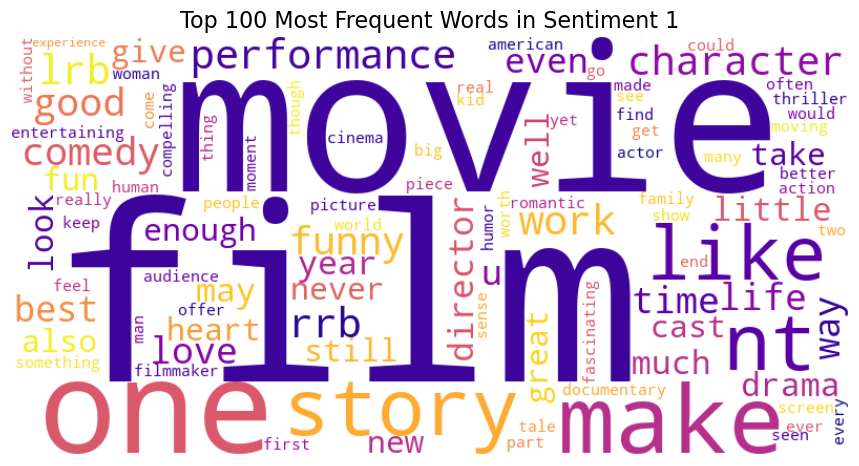

In [20]:
top_words_df = freq_df_1.head(100)
word_freq_dict = dict(zip(top_words_df['Word'], top_words_df['Frequency']))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma',
    contour_color='black',
    contour_width=1,
    random_state=42
).generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 100 Most Frequent Words in Sentiment 1', fontsize=16)
plt.tight_layout()
plt.axis('off')  # Hide axes
plt.show()

If you think lemmatization, stemming and other text preprocessing should be performed, code here. You can also go back and include it in the preprocessing function if you want.

You are also free to include any extra features that you extract from the text to aid in modeling (Optional)

In [29]:
# additional preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')

def clean_txt(str_in):
    clean_text = re.sub("[^a-zA-Z0-9\s'']", " ", str_in).lower().strip()
    return clean_text

def remove_sw(str_in):
    sw = stopwords.words('english')
    clean_text = clean_txt(str_in)
    tokens = word_tokenize(clean_text)
    filtered_words = [word for word in tokens if word not in sw]
    return ' '.join(filtered_words)

def get_lemma(str_in):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(str_in)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

def preprocess_text(text):
    return get_lemma(remove_sw(clean_txt(text)))

X_train = X_train.apply(preprocess_text)
X_val = X_val.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anyuchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anyuchen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 3. Fit model on preprocessed data


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Code Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(preprocessor(X_train), y_train)

RandomForestClassifier(random_state=42)

### 4. Generate predictions from X_test data and calculate accuracy


In [41]:
# Code here
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_model.predict(preprocessor(X_test))
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of Random Forest Model: {accuracy:.4f}")

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))

Test Accuracy of Random Forest Model: 0.7359

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       912
           1       0.73      0.74      0.74       909

    accuracy                           0.74      1821
   macro avg       0.74      0.74      0.74      1821
weighted avg       0.74      0.74      0.74      1821



### 5. Repeat the above process with different models


In [44]:
# Model 2 - Re fit a better RF model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(preprocessor(X_train), y_train)
y_pred = rf_model.predict(preprocessor(X_test))
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of Random Forest Model: {accuracy:.4f}")

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))

Test Accuracy of Random Forest Model: 0.7375

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       912
           1       0.73      0.75      0.74       909

    accuracy                           0.74      1821
   macro avg       0.74      0.74      0.74      1821
weighted avg       0.74      0.74      0.74      1821



In [46]:
# Create a third model using GridSearchCV

from sklearn.model_selection import GridSearchCV
import numpy as np

# Do grid search over atleast 2 hyperparams of RF and get your best model

# extract and print best score and parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(preprocessor(X_train), y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
y_test_pred = best_rf_model.predict(preprocessor(X_test))

accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy of Optimized Random Forest Model:", accuracy)

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.7192196531791908
Test Accuracy of Optimized Random Forest Model: 0.7336628226249313

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       912
           1       0.73      0.74      0.74       909

    accuracy                           0.73      1821
   macro avg       0.73      0.73      0.73      1821
weighted avg       0.73      0.73      0.73      1821



In [48]:
# Here are several classic ML architectures you can choose from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
## Experiment with atleast 3 different models from above imports

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(preprocessor(X_train), y_train)
y_pred = knn_model.predict(preprocessor(X_test))
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of KNN Model: {accuracy:.4f}")

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))

Test Accuracy of KNN Model: 0.5080

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       912
           1       0.84      0.02      0.03       909

    accuracy                           0.51      1821
   macro avg       0.67      0.51      0.35      1821
weighted avg       0.67      0.51      0.35      1821



In [52]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1, random_state=42)  # Linear kernel
svm_model.fit(preprocessor(X_train), y_train)

y_pred = svm_model.predict(preprocessor(X_test))

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of SVM Model: {accuracy:.4f}")

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))

Test Accuracy of SVM Model: 0.7963

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       912
           1       0.78      0.82      0.80       909

    accuracy                           0.80      1821
   macro avg       0.80      0.80      0.80      1821
weighted avg       0.80      0.80      0.80      1821



In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=150, subsample=0.8, random_state=42)
gb_model.fit(preprocessor(X_train), y_train)

y_pred = gb_model.predict(preprocessor(X_test))

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of Gradient Boosting Classifier Model: {accuracy:.4f}")

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))

Test Accuracy of Gradient Boosting Classifier Model: 0.6716

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.75      0.51      0.61       912
           1       0.63      0.83      0.72       909

    accuracy                           0.67      1821
   macro avg       0.69      0.67      0.66      1821
weighted avg       0.69      0.67      0.66      1821



Tabularize your results and compare them here:

In [58]:
# code here
results = {
    'Model': ['Random Forest I', 'Random Forest II', 'Random Forest with Grid Search','K-Nearest Neighbors', 'Support Vector Classifier', 'Gradient Boosting Classifier'],
    'Test Accuracy': [0.7359, 0.7375, 0.7337, 0.5080, 0.7963, 0.6716],
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)
display(results_df)

,Model,Test Accuracy
0,Random Forest I,0.7359
1,Random Forest II,0.7375
2,Random Forest with Grid Search,0.7337
3,K-Nearest Neighbors,0.5080
4,Support Vector Classifier,0.7963
5,Gradient Boosting Classifier,0.6716


### Discuss which models performed better and why?

--- Discussion here ---

Among all the models, the Support Vector Classifier (SVC) has the best performance. SVM excels in handling high-dimensional text data after applying TF-IDF vectorization. Its kernel method allows it to model clear class boundaries effectively, and its ability to maximize the margin between classes leads to better generalization on unseen data.

The Random Forest model seems to have the potential to perform better with tailored hyperparameter tuning. Its current performance may be limited by suboptimal parameter settings.

The K-Nearest Neighbors (KNN) model does not perform well because it is a relatively simple algorithm and often fails to capture complex patterns in the data.

The Gradient Boosting Classifier also underperforms because of poor hyperparameter tuning. Given its potential to iteratively improve model performance, it could achieve better results with careful adjustment of parameters.

I believe that both the Random Forest and Gradient Boosting Classifier models can achieve significant performance improvements once their hyperparameters are optimized.

## Instructions for Part 2 (neural networks):
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using keras Tokenizer
3. Fit model on preprocessed data
4. Generate predictions from X_test data


### 1.   Load Data


In [68]:
# Set up X_train, X_test, and y_train_labels objects
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# From train_df
X_train = train_df['review']# Your Code Here
y_train = train_df['sentiment']# Your Code Here

# From val_df
X_val = val_df['review']# Your Code Here
y_val = val_df['sentiment']# Your Code Here

# From test_df
X_test = test_df['review']# Your Code Here
y_test = test_df['sentiment']# Your Code Here

X_train.head()

0    a stirring , funny and finally transporting re...
1    apparently reassembled from the cutting-room f...
2    they presume their audience wo n't sit still f...
3    this is a visually stunning rumination on love...
4    jonathan parker 's bartleby should have been t...
Name: review, dtype: object

### 2.   Preprocess data using keras tokenizer


In [73]:
# This preprocessor function makes use of the tf.keras tokenizer

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
import numpy as np

# Build vocabulary from training text data

# preprocessor tokenizes words and makes sure all documents have the same length (perform padding with maxlen=100)
max_words = 10000
maxlen = 100

# I used the clean_txt function to remove the special characters from the reviews. 
X_train_clean = X_train.apply(clean_txt)
X_val_clean = X_val.apply(clean_txt)
X_test_clean = X_test.apply(clean_txt)

# Tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_clean)  # Fit only on training data

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_clean)
X_val_seq = tokenizer.texts_to_sequences(X_val_clean)
X_test_seq = tokenizer.texts_to_sequences(X_test_clean)

# Pad sequences to ensure uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')


print(f"Training data shape: {X_train_pad.shape}")
print(f"Validation data shape: {X_val_pad.shape}")
print(f"Test data shape: {X_test_pad.shape}")

#print(preprocessor(X_train).shape)
#print(preprocessor(X_test).shape)

Training data shape: (6920, 100)
Validation data shape: (872, 100)
Test data shape: (1821, 100)


### 3. Fit model on preprocessed data


In [78]:
from tensorflow.keras.layers import Dense, Embedding,Flatten, Dropout
from tensorflow.keras.models import Sequential

# A basic deep learning model (max 5 layers)

# Use validation data here
model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=100),  # Embedding layer
    Flatten(),  # Flatten layer
    Dense(128, activation='relu'), 
    Dropout(0.5), 
    Dense(64, activation='relu'),  
    Dropout(0.5), 
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Dense layer for binary classification
])


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(
    X_train_pad, y_train,       
    validation_data=(X_val_pad, y_val), 
    epochs=10,                  
    batch_size=32               
)

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4961 - loss: 0.6941 - val_accuracy: 0.5092 - val_loss: 0.6916
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5448 - loss: 0.6835 - val_accuracy: 0.7041 - val_loss: 0.6014
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7640 - loss: 0.5181 - val_accuracy: 0.7615 - val_loss: 0.5453
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8805 - loss: 0.2987 - val_accuracy: 0.7489 - val_loss: 0.6246
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9410 - loss: 0.1641 - val_accuracy: 0.7672 - val_loss: 0.7170
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9724 - loss: 0.0863 - val_accuracy: 0.7626 - val_loss: 0.9008
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9887 - loss: 0.0409 - val_accuracy: 0.7592 - val_loss: 1.2157
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9930 - loss: 0.0244 - val_accuracy: 0.

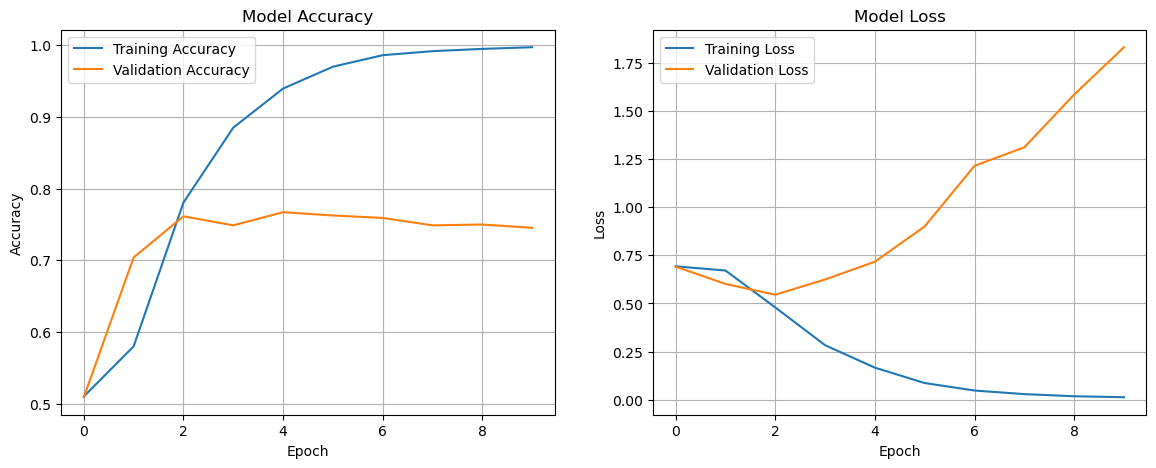

In [80]:
# Plot history
# Visualize the training history
def plot_history(history):
    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.grid()
    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    plt.grid()  # Optional: adds a grid for better readability
    plt.show()
plot_history(history)

### 4. Generate predictions from X_test data and calculate accuracy


In [82]:
# Code Here
y_pred = model.predict(X_test_pad)  
y_pred_classes = (y_pred > 0.5).astype(int)  

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy of Basic Deep Learning Model: {test_accuracy:.4f}")

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred_classes))

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
Test Accuracy of Basic Deep Learning Model: 0.7419

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       912
           1       0.73      0.78      0.75       909

    accuracy                           0.74      1821
   macro avg       0.74      0.74      0.74      1821
weighted avg       0.74      0.74      0.74      1821



### 5. Experiment with more models


In [84]:
# Train model 2 using same preprocessor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten, Bidirectional
from tensorflow.keras.optimizers import RMSprop
# Code an model with atleast 3 LSTM layers (with Embedding Layer)


model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=100),  
    Bidirectional(LSTM(64, return_sequences=True)),  
    Dropout(0.5),  
    LSTM(32, return_sequences=True),  
    Dropout(0.5),
    LSTM(16), 
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compile the model
model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_lstm.fit(
    X_train_pad, y_train,       
    validation_data=(X_val_pad, y_val),  
    epochs=20,                  
    batch_size=32               
)


Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.5043 - loss: 0.6930 - val_accuracy: 0.5092 - val_loss: 0.6931
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.5165 - loss: 0.6926 - val_accuracy: 0.5092 - val_loss: 0.6933
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.5260 - loss: 0.6920 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.5151 - loss: 0.6928 - val_accuracy: 0.5092 - val_loss: 0.6934
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.5099 - loss: 0.6930 - val_accuracy: 0.5092 - val_loss: 0.6944
Epoch 6/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.5295 - loss: 0.6916 - val_accuracy: 0.5092 - val_loss: 0.6932
Epoch 7/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.5219 - loss: 0.6923 - val_accuracy: 0.5092 - val_loss: 0.6931
Epoch 8/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.5133 - loss: 0.6928 - 

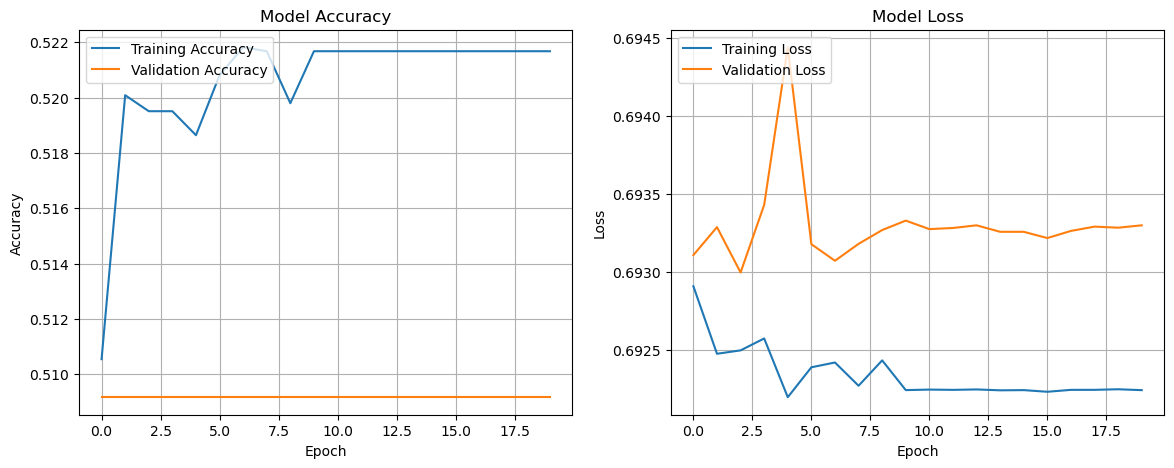

In [86]:
# Plot history
plot_history(history)

Does your model perform better or worse than your prior deep learning model? Why might that be the case?

--- Answer Here ---

The model with LSTM layers doesn't perform well compared with a basic deep learning model with only regular dense layers. One reason might be that the LSTM didn't learn the semantic meaning effectively because the embedding layer starts with random weights and doesn't use pre-trained embeddings, resulting in low-quality word representations. Another reason might be that the dataset contains short text and does not exhibit strong sequential patterns, making it difficult for the LSTM to leverage its full potential.

### 6. Tune model within range of hyperparameters with Keras Tuner

*Consult [documentation](https://keras.io/guides/keras_tuner/getting_started/) to see full functionality.*

In [96]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Flatten
import keras_tuner as kt

# Define model structure & parameter search space with a function
# code LSTM--based model with provision for searching hyperparameter space, return model


#initialize the keras search tuner (which will search through parameters)
# Define the following:
#Your function that returns the model
#objective to optimize
#max number of trials to run during search
#higher number reduces variance of results; guages model performance more accurately


import tensorflow as tf
from tensorflow.keras import layers
import keras_tuner as kt

# Function to build the LSTM model with hyperparameter search space
def build_model(hp):
    model = tf.keras.Sequential()
    
    # Embedding Layer with tunable output dimension
    model.add(layers.Embedding(
        input_dim=10000,
        output_dim=hp.Int('embedding_output_dim', min_value=16, max_value=64, step=16),
        input_length=100
    ))
    
    # LSTM Layer
    model.add(layers.LSTM(units=hp.Int('lstm_units', min_value=32, max_value=256, step=32)))
    
    # Dense Layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile Model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    directory='embedding_tuning',
    project_name='lstm_embedding'
)

tuner.search(X_train_pad, y_train, epochs=10, validation_data=(X_val_pad, y_val), batch_size=32)

Reloading Tuner from embedding_tuning/lstm_embedding/tuner0.json


In [98]:
# Get the top 2 hyperparameters.

# Build model with best hyperparameters

# Fit with the entire dataset.

top_hps = tuner.get_best_hyperparameters(num_trials=2)

# Build and fit the models
for i, hp in enumerate(top_hps):
    print(f"Fitting model {i+1} with the following hyperparameters:")
    print(hp.values)

    # Build the model using the hyperparameters
    model = tuner.hypermodel.build(hp)

    # Fit the model on the entire dataset
    history = model.fit(X_train_pad, y_train, epochs=20, validation_data=(X_val_pad, y_val), batch_size=32)

Fitting model 1 with the following hyperparameters:
{'embedding_output_dim': 64, 'lstm_units': 96, 'learning_rate': 0.001}
Epoch 1/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5226 - loss: 0.6934 - val_accuracy: 0.5092 - val_loss: 0.6936
Epoch 2/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5204 - loss: 0.6925 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 3/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5240 - loss: 0.6922 - val_accuracy: 0.5092 - val_loss: 0.6931
Epoch 4/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5162 - loss: 0.6928 - val_accuracy: 0.5092 - val_loss: 0.6934
Epoch 5/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5292 - loss: 0.6917 - val_accuracy: 0.5092 - val_loss: 0.6931
Epoch 6/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5195 - loss: 0.6925 - val_accuracy: 0.5092 - val_loss: 0.6932
Epoch 7/20
217/217 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5251 - loss: 0.6921 - val_accuracy: 

What were the best hyperparameters found? Why might that be performing better than others?

--- Answer Here ---

The best hyperparameters found were {'embedding_output_dim': 64, 'lstm_units': 96, 'learning_rate': 0.001}. The embedding_output_dim of 64 indicates that each word is represented as a 64-dimensional vector, striking a balance between expressiveness, memory efficiency and computational efficiency. The LSTM layer has 96 neurons, which provides a good compromise between capturing sequence patterns effectively and minimizing the risk of overfitting. More neurons could increase the risk of overfitting. The learning rate of 0.001 for the Adam optimizer ensures gradual weight adjustments, promoting stable convergence without overshooting the minimum loss.

In [140]:
# Submit Model 3:

#-- Generate predicted y values (Model 3)
y_pred = model.predict(X_test_pad)
y_pred_labels = (y_pred > 0.5).astype(int)
# extract correct prediction labels
correct_predictions = y_pred_labels.flatten() == y_test
print(correct_predictions.value_counts())

# Submit Model 1 to Competition Leaderboard
submission = pd.DataFrame({
    'ID': range(len(y_pred_labels)),  # Generate sequential IDs starting from 0
    'Prediction': y_pred_labels.flatten()  # Predicted labels (0 or 1)
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
sentiment
False    912
True     909
Name: count, dtype: int64
Submission file saved as 'submission.csv'


## 3 more models

Train three more prediction models to try to predict the SST sentiment
dataset well.

○ Use Conv1d layers in first model

○ Use Transfer learning with Glove Embeddings for 2nd model

○ Third model can be any Transfer learning model of your choice (Transformer architecture required, eg. BERT and related)

## Model 1

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5013 - loss: 0.6934 - val_accuracy: 0.5092 - val_loss: 0.6934
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5202 - loss: 0.6927 - val_accuracy: 0.5092 - val_loss: 0.6920
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5437 - loss: 0.6833 - val_accuracy: 0.7259 - val_loss: 0.5642
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7576 - loss: 0.5155 - val_accuracy: 0.7810 - val_loss: 0.4773
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8707 - loss: 0.3336 - val_accuracy: 0.7706 - val_loss: 0.5854
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9011 - loss: 0.2619 - val_accuracy: 0.7695 - val_loss: 0.5649
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9282 - loss: 0.1994 - val_accuracy: 0.7798 - val_loss: 0.5272
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9433 - loss: 0.1661 - val_accuracy: 0.

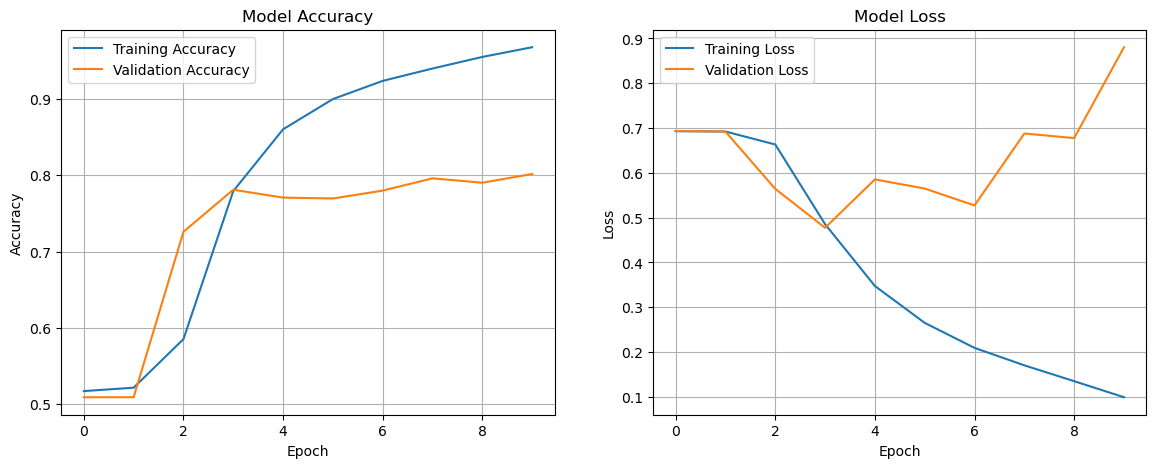

In [150]:
# Model 1

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=100),  # Embedding layer
    Conv1D(filters=32, kernel_size=3, activation='relu'),  # 1D Convolutional layer
    MaxPooling1D(pool_size=2), 
    Conv1D(filters=64, kernel_size=3, activation='relu'),  # Second Conv1D layer
    MaxPooling1D(pool_size=2),  
    Flatten(),  # Flatten the output for dense layers
    Dense(128, activation='relu'), 
    Dropout(0.5),  
    Dense(64, activation='relu'),  
    Dropout(0.5),  
    Dense(16, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_val_pad, y_val),
    epochs=10,
    batch_size=32
)
plot_history(history)

## Model 2

In [153]:
import urllib.request

url = "http://nlp.stanford.edu/data/wordvecs/glove.6B.zip"
filename = "glove.6B.zip"
urllib.request.urlretrieve(url, filename)
print("Download complete.")

Download complete.


In [156]:
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:  # Use the appropriate file 100d
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs
print(f"Loaded {len(embedding_index)} word vectors.")

Loaded 400001 word vectors.


In [158]:
vocab_size = 10000  
embedding_dim = 100 
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Epoch 1/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.5124 - loss: 0.6929 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 2/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.5226 - loss: 0.6924 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 3/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.5173 - loss: 0.6928 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 4/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.5156 - loss: 0.6927 - val_accuracy: 0.5092 - val_loss: 0.6934
Epoch 5/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.5176 - loss: 0.6927 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 6/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.5210 - loss: 0.6929 - val_accuracy: 0.5092 - val_loss: 0.6938
Epoch 7/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.5160 - loss: 0.6929 - val_accuracy: 0.5092 - val_loss: 0.6941
Epoch 8/10
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.5219 - loss: 0.6925 - 

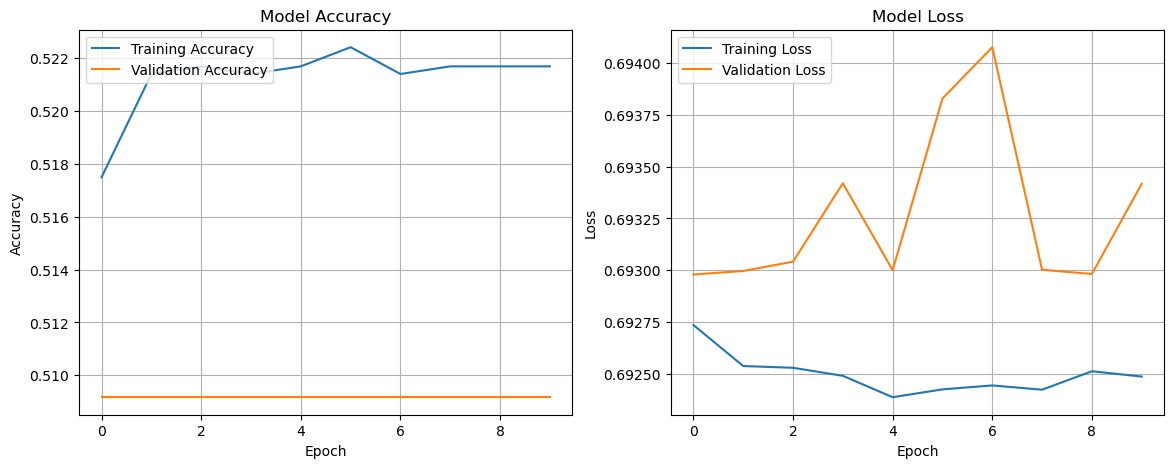

In [160]:
model_lstm = Sequential([
    Embedding(input_dim=vocab_size, 
              output_dim=embedding_dim, 
              weights=[embedding_matrix],  # Use the pre-trained embedding matrix
              input_length=100, 
              trainable=False),  # Freeze embeddings to prevent updates during training
    Bidirectional(LSTM(64, return_sequences=True)),  
    Dropout(0.5),  
    LSTM(32, return_sequences=True),  
    Dropout(0.5),
    LSTM(16), 
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compile the model
optimizer = RMSprop(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_lstm.fit(
    X_train_pad, y_train,       
    validation_data=(X_val_pad, y_val),  
    epochs=10,                  
    batch_size=32               
)
plot_history(history)

## Model 3

In [162]:
# Load tokenizer
from transformers import TFBertForSequenceClassification, BertTokenizer
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Ensure X_train_clean and y_train are in the correct format
X_train_clean = list(X_train_clean)  
y_train = list(y_train)  

# Load pre-trained tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize your training data
train_encodings = tokenizer(
    X_train_clean,  
    truncation=True,
    padding=True,
    max_length=100,
    return_tensors="tf"
)

# Prepare labels as TensorFlow tensors
train_labels = tf.convert_to_tensor(y_train, dtype=tf.int32)

# Create TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask']
    },
    train_labels
)).shuffle(len(X_train_clean)).batch(16)

# Determine number of unique labels
num_labels = len(set(y_train))

# Load pre-trained model
model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels=num_labels
)

X_val_clean = list(X_val_clean)  
y_val = list(y_val) 

# Tokenize the validation data
val_encodings = tokenizer(
    X_val_clean,
    truncation=True,
    padding=True,
    max_length=100,
    return_tensors="tf"
)

# Prepare validation labels as TensorFlow tensors
val_labels = tf.convert_to_tensor(y_val, dtype=tf.int32)

# Create TensorFlow validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids': val_encodings['input_ids'],
        'attention_mask': val_encodings['attention_mask']
    },
    val_labels
)).batch(16)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [164]:
# Initialize the optimizer
# Specify a learning rate

# Compile the model
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,  
    epochs=3
)

Epoch 1/3
433/433 [==============================] - 376s 859ms/step - loss: 0.7152 - accuracy: 0.5217 - val_loss: 0.6931 - val_accuracy: 0.5092
Epoch 2/3
433/433 [==============================] - 410s 946ms/step - loss: 0.6931 - accuracy: 0.5217 - val_loss: 0.6931 - val_accuracy: 0.5092
Epoch 3/3
433/433 [==============================] - 417s 962ms/step - loss: 0.6931 - accuracy: 0.5217 - val_loss: 0.6931 - val_accuracy: 0.5092


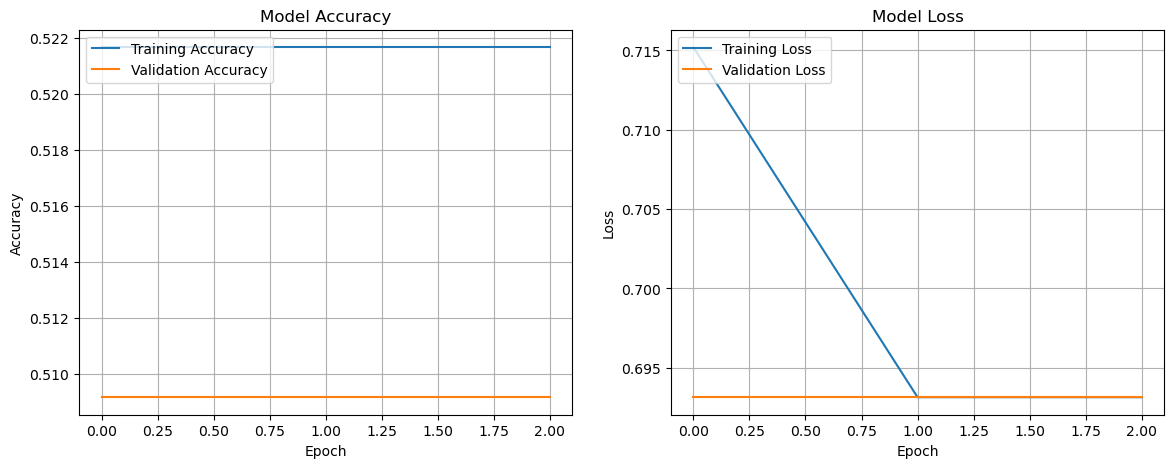

In [166]:
plot_history(history)

Tabularize results from ALL your models in this notebook and compare performance

In [168]:
results = {
    'Model': ['Basic Deep Learning Model With Conv1d layers', 'Transfer learning Model with Glove Embeddings', 'Transfer learning Model with Bert'],
    'Validation Accuracy': [0.8016, 0.5092, 0.5092],
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)
display(results_df)

,Model,Validation Accuracy
0,Basic Deep Learning Model With Conv1d layers,0.8016
1,Transfer learning Model with Glove Embeddings,0.5092
2,Transfer learning Model with Bert,0.5092


Results Discussion : Point out why specific models may have performed better than others. and discuss failures if any.

## Results Discussion and Reflections

Among the three models I explored, the basic deep learning model with Conv1D layers performed the best overall in terms of accuracy. I initially expected the transfer learning models, especially the ones using GloVe embeddings and BERT, to outperform the simpler Conv1D model, but they didn’t. This result was both surprising and frustrating, as I invested a lot of time tuning hyperparameters and refining the models, only to see the validation accuracy barely improve.
1. Basic Deep Learning Model with Conv1D Layers
   
●	Why It Worked Well: The Conv1D layers excel at picking up local patterns in text, such as n-grams or phrases, which likely gave it an edge over the other models. Since the dataset includes relatively short reviews, Conv1D might have been able to extract the most relevant features without overcomplicating the process.

●	Challenges: Despite its relatively good performance, the validation accuracy was still lower than I’d hoped. I think this may be because Conv1D struggles with capturing global context or deeper semantic meaning in text. Also, preprocessing inconsistencies (like handling rare words or punctuation) could have impacted its ability to generalize.


2. Transfer Learning Model with GloVe Embeddings
   
●	Why It Should Have Done Better: Pre-trained embeddings like GloVe are supposed to provide a strong foundation by encoding semantic relationships between words. I expected this to significantly boost the model’s ability to classify sentiments accurately.

●	Why It Didn’t: One big limitation was that I froze the embeddings during training, which meant they couldn’t adapt to the specific dataset. I now realize that tuning the embeddings or even partially unfreezing them might have made a difference. Additionally, GloVe embeddings are static and don’t capture the context-dependent nature of words, which could have limited their effectiveness here. I also experimented with adjusting dropout rates and learning rates, but these only led to minor changes in accuracy.

3. Transfer Learning Model with BERT

●	Why I Had High Hopes: BERT is a state-of-the-art model for many NLP tasks, and its ability to capture contextual relationships made me optimistic about its performance. It’s particularly good at understanding the nuances in longer and more complex texts.

●	Why It Fell Short: In hindsight, I think there were a few issues here. First, BERT requires extensive fine-tuning to work well, and while I tried different configurations for hyperparameters like learning rate and batch size, the improvements were marginal. Second, the dataset’s relatively short and simple reviews didn’t give BERT much room to showcase its strengths in capturing intricate relationships. Lastly, the tokenization and preprocessing steps might not have been optimal, which could have reduced the quality of input to the model.

## Reflections on Challenges

One of the most significant challenges was that, no matter how much I adjusted the models, the validation accuracy plateaued early on. This was frustrating because I felt like I was putting in a lot of effort but not seeing the results I wanted. Here are a few reasons I think this happened:

1.	Dataset Limitations: The dataset may not have been diverse or large enough for the models to fully generalize. If there were noisy or ambiguous samples, this could have confused the models and led to lower accuracy.
2.	Hyperparameter Sensitivity: I spent a lot of time tuning hyperparameters like the number of layers, dropout rates, and learning rates. While I saw some slight improvements, they weren’t as impactful as I’d hoped, suggesting that the models were hitting their performance ceiling with this dataset.
3.	Mismatch Between Models and Data: While GloVe and BERT are powerful, they’re designed for tasks that benefit from large datasets and complex context. This dataset, being relatively simple and short, might not have allowed them to shine.


## Final Thoughts

Although the results were not as strong as I had hoped, this project taught me a lot about the complexities of working with machine learning models, especially in NLP. I now have a deeper appreciation for how much data quality, preprocessing, and hyperparameter tuning matter. Even though I only saw slight improvements, I feel like the time I spent on this was valuable for understanding where models succeed and fail. Going forward, I think exploring larger datasets or refining preprocessing techniques could help these models achieve better results. This experience also taught me that sometimes, simpler models like Conv1D can outperform more complex ones when the dataset aligns better with their strengths.